## Bag of Words

In [2]:
from nltk.tokenize import word_tokenize

sentence = 'The quick brown fox jumps over the lazy dog.'
sentence = sentence.lower()

words = word_tokenize(sentence)

word_dict = dict.fromkeys(words, 0)
for word in word_dict.keys():
    word_dict[word] = words.count(word)

word_dict

{'the': 2,
 'quick': 1,
 'brown': 1,
 'fox': 1,
 'jumps': 1,
 'over': 1,
 'lazy': 1,
 'dog': 1,
 '.': 1}

In [1]:
import pandas as pd
from nltk.tokenize import word_tokenize

sentences = ['The quick brown fox jumps over the lazy dog.', 'The cat chases the mouse and it squeaks loudly.']
sentences = [sentence.lower() for sentence in sentences]


all_words = set()
for sentence in sentences:
    words = word_tokenize(sentence)
    for word in words:
        all_words.add(word)

df = pd.DataFrame({}, index=range(len(sentences)), columns=list(all_words))

words_dict = dict.fromkeys(all_words, 0)

for i in range(len(sentences)):
    sentence_words = word_tokenize(sentences[i])
    for word in words_dict.keys():
        words_dict[word] = sentence_words.count(word)
    df.iloc[i, :] = words_dict

df.T

,0,1
cat,0,1
quick,1,0
jumps,1,0
.,1,1
fox,1,0
loudly,0,1
lazy,1,0
brown,1,0
dog,1,0
and,0,1


Count Vectorizer

In [3]:
sentences = ['The quick brown fox jumps over the lazy dog.', 'The cat chases the mouse and it squeaks loudly.',"dog quick"]

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
cv = CountVectorizer()

In [7]:
vect_data = cv.fit_transform(sentences)

In [8]:
vect_data.toarray()

array([[0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 2],
       [1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]])

In [9]:
df = pd.DataFrame(vect_data.toarray(),columns = cv.get_feature_names_out())

In [10]:
df

,and,brown,cat,chases,dog,fox,it,jumps,lazy,loudly,mouse,over,quick,squeaks,the
0,0,1,0,0,1,1,0,1,1,0,0,1,1,0,2
1,1,0,1,1,0,0,1,0,0,1,1,0,0,1,2
2,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [15]:
sentence_3 = 'The lazy cat jumps over the quick dog.'

In [16]:
fts3 = cv.transform([sentence_3]).toarray()
fts3

array([[0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 2]])

In [12]:
sentences = []
with open("india.txt","r") as file:
    sentences = file.readlines()

sentences

['0Our country has fertile soil that makes it the largest wheat producer in the whole world India has given birth to famous personalities in the field of literature and science. For instance, Rabindranath Tagore, CV Raman, Dr Abdul Kalam, and others are Indians.\n',
 '1It is a country that is home to thousands of villages. Similarly, the fields of India are fed by the mighty rivers. For instance, Ganga, Kaveri, Yamuna, Narmada, and more are rivers of India.\n',
 '2Most importantly, the coasts of our country are guarded by the deep oceans and the mighty Himalayas are our natural frontiers. Being a secular state, India has a variety of religions that prosper happily together.\n',
 '3The natural beauty of Kashmir, the mighty rivers and gorgeous valleys truly make it a paradise.\n']

In [13]:
len(sentences)

4

In [14]:
sentences = [sentence[1:] for sentence in sentences]
sentences

['Our country has fertile soil that makes it the largest wheat producer in the whole world India has given birth to famous personalities in the field of literature and science. For instance, Rabindranath Tagore, CV Raman, Dr Abdul Kalam, and others are Indians.\n',
 'It is a country that is home to thousands of villages. Similarly, the fields of India are fed by the mighty rivers. For instance, Ganga, Kaveri, Yamuna, Narmada, and more are rivers of India.\n',
 'Most importantly, the coasts of our country are guarded by the deep oceans and the mighty Himalayas are our natural frontiers. Being a secular state, India has a variety of religions that prosper happily together.\n',
 'The natural beauty of Kashmir, the mighty rivers and gorgeous valleys truly make it a paradise.\n']

In [15]:
cv = CountVectorizer()

In [16]:
vect_data = cv.fit_transform(sentences)

In [17]:
vect_data.toarray()

array([[1, 2, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
        0, 0, 2, 0, 0, 0, 2, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 3,
        0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0],
       [0, 1, 2, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 2, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
        1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 1, 2,
        1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
        0, 1, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 3,
        0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
        0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0

In [18]:
df = pd.DataFrame(vect_data.toarray(),columns = cv.get_feature_names_out())

In [19]:
df

,abdul,and,are,beauty,being,birth,by,coasts,country,cv,...,to,together,truly,valleys,variety,villages,wheat,whole,world,yamuna
0,1,2,1,0,0,1,0,0,1,1,...,1,0,0,0,0,0,1,1,1,0
1,0,1,2,0,0,0,1,0,1,0,...,1,0,0,0,0,1,0,0,0,1
2,0,1,2,0,1,0,1,1,1,0,...,0,1,0,0,1,0,0,0,0,0
3,0,1,0,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0


In [26]:
sentences = []
with open("india.txt","r+") as file:
    print(file.readlines())
    

['0Our country has fertile soil that makes it the largest wheat producer in the whole world India has given birth to famous personalities in the field of literature and science. For instance, Rabindranath Tagore, CV Raman, Dr Abdul Kalam, and others are Indians.\n', '1It is a country that is home to thousands of villages. Similarly, the fields of India are fed by the mighty rivers. For instance, Ganga, Kaveri, Yamuna, Narmada, and more are rivers of India.\n', '2Most importantly, the coasts of our country are guarded by the deep oceans and the mighty Himalayas are our natural frontiers. Being a secular state, India has a variety of religions that prosper happily together.\n', '3The natural beauty of Kashmir, the mighty rivers and gorgeous valleys truly make it a paradise.\n']


In [27]:
sentences = ['Our country has fertile soil that makes it the largest wheat producer in the whole world India has given birth to famous personalities in the field of literature and science. For instance, Rabindranath Tagore, CV Raman, Dr Abdul Kalam, and others are Indians.\n',
 'It is a country that is home to thousands of villages. Similarly, the fields of India are fed by the mighty rivers. For instance, Ganga, Kaveri, Yamuna, Narmada, and more are rivers of India.\n',
 'Most importantly, the coasts of our country are guarded by the deep oceans and the mighty Himalayas are our natural frontiers. Being a secular state, India has a variety of religions that prosper happily together.\n',
 'The natural beauty of Kashmir, the mighty rivers and gorgeous valleys truly make it a paradise.\n']

In [28]:
sentences

['Our country has fertile soil that makes it the largest wheat producer in the whole world India has given birth to famous personalities in the field of literature and science. For instance, Rabindranath Tagore, CV Raman, Dr Abdul Kalam, and others are Indians.\n',
 'It is a country that is home to thousands of villages. Similarly, the fields of India are fed by the mighty rivers. For instance, Ganga, Kaveri, Yamuna, Narmada, and more are rivers of India.\n',
 'Most importantly, the coasts of our country are guarded by the deep oceans and the mighty Himalayas are our natural frontiers. Being a secular state, India has a variety of religions that prosper happily together.\n',
 'The natural beauty of Kashmir, the mighty rivers and gorgeous valleys truly make it a paradise.\n']

In [29]:
with open("india.txt","w") as file:
    for i,line in enumerate(sentences):
        file.write(str(i)+line)

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(ngram_range=(1,2))

In [31]:
vect_data = cv.fit_transform(sentences)
vect_data.toarray()

array([[1, 1, 2, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
        0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
        1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 2, 2, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
        0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
        1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
        0, 1, 0, 3, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 1, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
        0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
        1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 2, 1, 0, 0, 1, 1, 0, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
        1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,

In [32]:
df = pd.DataFrame(vect_data.toarray(),columns = cv.get_feature_names_out())
df

,abdul,abdul kalam,and,and gorgeous,and more,and others,and science,and the,are,are fed,...,villages,villages similarly,wheat,wheat producer,whole,whole world,world,world india,yamuna,yamuna narmada
0,1,1,2,0,0,1,1,0,1,0,...,0,0,1,1,1,1,1,1,0,0
1,0,0,1,0,1,0,0,0,2,1,...,1,1,0,0,0,0,0,0,1,1
2,0,0,1,0,0,0,0,1,2,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## TF*IDF(Term_Frequency, Inverse_Document_Frequency) 

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

In [34]:
tfidf = TfidfVectorizer(stop_words='english')

In [35]:
x_vect = tfidf.fit_transform(sentences)

In [36]:
df = pd.DataFrame(data=x_vect.toarray(),
                  columns=tfidf.get_feature_names_out())

df

,abdul,beauty,birth,coasts,country,cv,deep,dr,famous,fed,...,state,tagore,thousands,truly,valleys,variety,villages,wheat,world,yamuna
0,0.206564,0.000000,0.206564,0.000000,0.131847,0.206564,0.000000,0.206564,0.206564,0.000000,...,0.000000,0.206564,0.000000,0.000000,0.000000,0.000000,0.000000,0.206564,0.206564,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.161852,0.000000,0.000000,0.000000,0.000000,0.253572,...,0.000000,0.000000,0.253572,0.000000,0.000000,0.000000,0.253572,0.000000,0.000000,0.253572
2,0.000000,0.000000,0.000000,0.259554,0.165670,0.000000,0.259554,0.000000,0.000000,0.000000,...,0.259554,0.000000,0.000000,0.000000,0.000000,0.259554,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.339998,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.339998,0.339998,0.000000,0.000000,0.000000,0.000000,0.000000


In [37]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

In [38]:
cv = CountVectorizer()

In [39]:
word_vector = cv.fit_transform(sentences)
tfidf_transformer = TfidfTransformer()
x = tfidf_transformer.fit_transform(word_vector)

In [40]:
df = pd.DataFrame(data=x.toarray(),columns=cv.get_feature_names_out())
df

,abdul,and,are,beauty,being,birth,by,coasts,country,cv,...,to,together,truly,valleys,variety,villages,wheat,whole,world,yamuna
0,0.160494,0.167505,0.102441,0.000000,0.00000,0.160494,0.000000,0.00000,0.102441,0.160494,...,0.126536,0.00000,0.000000,0.000000,0.00000,0.000000,0.160494,0.160494,0.160494,0.000000
1,0.000000,0.097453,0.238397,0.000000,0.00000,0.000000,0.147234,0.00000,0.119199,0.000000,...,0.147234,0.00000,0.000000,0.000000,0.00000,0.186748,0.000000,0.000000,0.000000,0.186748
2,0.000000,0.099651,0.243775,0.000000,0.19096,0.000000,0.150555,0.19096,0.121888,0.000000,...,0.000000,0.19096,0.000000,0.000000,0.19096,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.159592,0.000000,0.305824,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.00000,0.305824,0.305824,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000


# Text_Clustering

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
file = open('./bbc-text-data.csv')

In [22]:
data = file.readlines()

In [23]:
len(data)

2225

### Feature Exraction

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
tfidf = TfidfVectorizer(stop_words='english')

In [26]:
x_vect = tfidf.fit_transform(data)

In [27]:
x_vect.shape

(2225, 29126)

### Elbow method

In [28]:
from sklearn.cluster import KMeans

In [29]:
sse = []
for k in range(1,16):
    km = KMeans(n_clusters=k,random_state=0)
    km.fit_predict(x_vect)
    sse.append(km.inertia_)

/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/dai/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [51]:
len(sse)

15

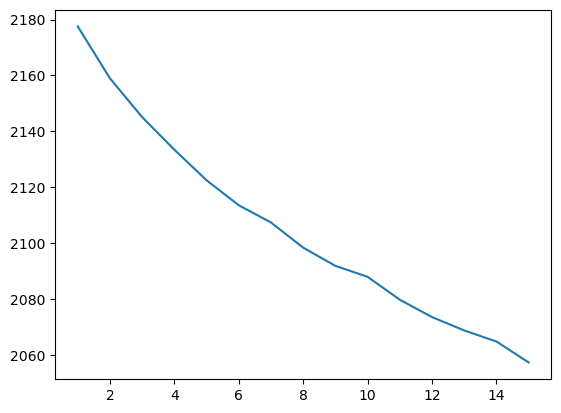

In [52]:
plt.plot(range(1,16),sse)

In [53]:
#pip install kneed

In [54]:
from kneed import KneeLocator

In [68]:
kl = KneeLocator(range(1,16),sse,curve="convex",direction="decreasing")

In [69]:
kl.elbow

8

In [61]:
km = KMeans(n_clusters=8,random_state=0)
labels = km.fit_predict(x_vect)

In [62]:
labels

array([5, 7, 2, ..., 7, 7, 2], dtype=int32)

In [63]:
km.labels_

array([5, 7, 2, ..., 7, 7, 2], dtype=int32)

In [70]:
len(labels)

2225

In [73]:
df = pd.DataFrame(data,columns=['text'])
len(df)

2225

In [75]:
print(len(df[labels==2]))
df[labels==2]

324


,text
2,tigers wary of farrell gamble leicester say ...
3,yeading face newcastle in fa cup premiership s...
8,wilkinson fit to face edinburgh england captai...
22,bates seals takeover ken bates has completed h...
23,cole faces lengthy injury lay-off aston villa ...
...,...
2188,mexicans tracking unhappy juninho mexican outf...
2195,owen delighted with real display michael owen ...
2209,time to get tough on friendlies for an intern...
2218,davies favours gloucester future wales hooker ...


In [76]:
for i in range(len(df[labels==2])):
    print(f"{i}: ",len(df[labels==i]))

0:  50
1:  184
2:  324
3:  205
4:  168
5:  367
6:  187
7:  740
8:  0
9:  0
10:  0
11:  0
12:  0
13:  0
14:  0
15:  0
16:  0
17:  0
18:  0
19:  0
20:  0
21:  0
22:  0
23:  0
24:  0
25:  0
26:  0
27:  0
28:  0
29:  0
30:  0
31:  0
32:  0
33:  0
34:  0
35:  0
36:  0
37:  0
38:  0
39:  0
40:  0
41:  0
42:  0
43:  0
44:  0
45:  0
46:  0
47:  0
48:  0
49:  0
50:  0
51:  0
52:  0
53:  0
54:  0
55:  0
56:  0
57:  0
58:  0
59:  0
60:  0
61:  0
62:  0
63:  0
64:  0
65:  0
66:  0
67:  0
68:  0
69:  0
70:  0
71:  0
72:  0
73:  0
74:  0
75:  0
76:  0
77:  0
78:  0
79:  0
80:  0
81:  0
82:  0
83:  0
84:  0
85:  0
86:  0
87:  0
88:  0
89:  0
90:  0
91:  0
92:  0
93:  0
94:  0
95:  0
96:  0
97:  0
98:  0
99:  0
100:  0
101:  0
102:  0
103:  0
104:  0
105:  0
106:  0
107:  0
108:  0
109:  0
110:  0
111:  0
112:  0
113:  0
114:  0
115:  0
116:  0
117:  0
118:  0
119:  0
120:  0
121:  0
122:  0
123:  0
124:  0
125:  0
126:  0
127:  0
128:  0
129:  0
130:  0
131:  0
132:  0
133:  0
134:  0
135:  0
136:  0

In [78]:
df[labels==1]

,text
4,ocean s twelve raids box office ocean s twelve...
9,last star wars not for children the sixth an...
10,berlin cheers for anti-nazi film a german movi...
26,career honour for actor dicaprio actor leonard...
29,halloween writer debra hill dies screenwriter ...
...,...
2165,briton wins short film oscar three of the five...
2178,hollywood ready for oscars night hollywood is ...
2181,women in film are earning less women in the ...
2208,snicket tops us box office chart the film adap...
